# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [186]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

## Explicação 1:

Neste tópico julguei necessário converter apenas a coluna 'Idoso' para números boleanos, ja que a mesma tem essa característica, e essa conversão pode minimizar riscos de respostas fora do padrão desejado.
As demais estão de acordo, não apresentando risco de atrapalharem a nossa análise.

In [188]:
df.dtypes


customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

In [190]:
df['Idoso'] = df['Idoso'].astype(bool)

df.dtypes

customerID             object
Genero                 object
Idoso                    bool
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [192]:
df.isnull().sum()/len(df)*100


customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

## Explicação 2.b.1:

Tomei a liberdade de criar um novo tópico no exercício, pois ao fazer a exclusão dos dados nulos da coluna 'Genero', eu percebi que os dados nulos da coluna 'Churn' também estavam sendo excluídos. Isso me gerou uma curiosidade se havia algum bug no meu código, então procurei na internet uma linha de código que me ajudasse a visualizar a correlação entre os números nulos dessas colunas.

Como podemos ver acima, a coluna 'Churn' possuí 5 linhas com dados nulos e coincidentemente essas mesmas colunas também estão nulas na coluna 'Genero'.

Então decidi analisar a importância dessas 5 linhas nulas do 'Churn', antes de realizar qualquer ação de exclusão ou alteração dessas duas colunas citadas.

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [196]:
df['Genero'].isnull().sum()

12

In [198]:
df['Churn'].isnull().sum()


5

In [200]:
print(df[df['Genero'].isna() & df['Churn'].isna()].shape[0])

5


## Explicação 2.b

#### Distribuição de Churn:
Plotei um histograma para analisar a distribuição da coluna 'Churn', e podemos ver que a grande maioria dos clientes não cancelou os serviços contratados (73% Negativo X 26% Positivo)

#### Análise de dados nulos:
Foi possível observar apenas um padrão nos 5 valores nulos da coluna 'Churn'. Todos os valores nulos não eram idosos.

Entãso decidi analisar a coluna 'Idosos. Vimos que 83% dos clientes não são idosos, então os Churns nulos estão dentro da maioria da coluna 'Idosos'.

Conclui-se que essa similaridade não é capaz de enviesar nossa análise.

#### Exclusão de dados nulos:
A análise sugere que a exclusão dos registros nulos das colunas 'Genero' e 'Churn' é segura e não comprometerá a integridade dos resultados.

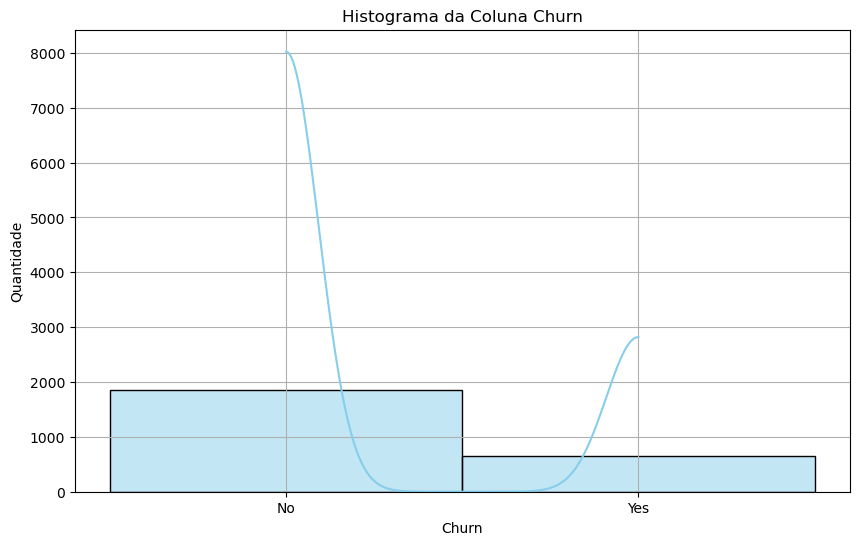

In [202]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.histplot(data=df, x='Churn', bins=20, kde=True, color='skyblue',)
plt.title('Histograma da Coluna Churn')
plt.ylabel('Quantidade')
plt.show()

In [204]:
df['Churn'].value_counts(normalize=True)*100

Churn
No     73.987976
Yes    26.012024
Name: proportion, dtype: float64

In [206]:
df[df['Churn'].isnull()]

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
5,9305-CDSKC,NaN,False,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,False,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,False,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,False,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,False,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


In [208]:
df['Idoso'].count()

2500

In [212]:
df['Idoso'].value_counts(normalize=True)*100

Idoso
False    83.92
True     16.08
Name: proportion, dtype: float64

In [214]:
df.dropna(subset=['Genero'], inplace=True)

In [216]:
df.isnull().sum()/len(df)*100

customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
PhoneService          59.565916
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal      12.580386
Total_Pago             0.000000
Churn                  0.000000
dtype: float64

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

## Explicação 2.c

#### Coluna 'PhoneService':
Por se tratar de uma coluna com resposta binária (Yes/No), apenas plotando um histograma podemos identificar a média, mediana e moda. 

A moda, média e mediana apontam "Yes" como o valor dominante no conjunto de dados. Substituir nulos pela moda ("Yes") preserva a distribuição original e evita viés. Essa substituição não altera significativamente as métricas de tendência central, já que não há evidências de que os nulos representem um comportamento distinto.

#### Coluna 'Pagamento_Mensal':
Analisando a média e a mediana dessa coluna, visualizamos mais valores concentrados abaixo da mediana, mas não extrema, já que a diferença é pequena. Por conta dessa variação, decidi plotar um boxplot para conferir a existência de outliers. O boxplot não mostrou outliers significativos, indicando que a distribuição é relativamente limpa e sem valores absurdamente altos ou baixos.

Após descartar a existência de outliers, plotei um histograma e percebi que existe uma grande concentração entre 20 e 30 doláres, provavelmente por conta de um pacote de serviços mais acessível.

Então decido susbtituir os valores nulos pela média, pois a média se aproxima mais da zona com maior desindade de dados.

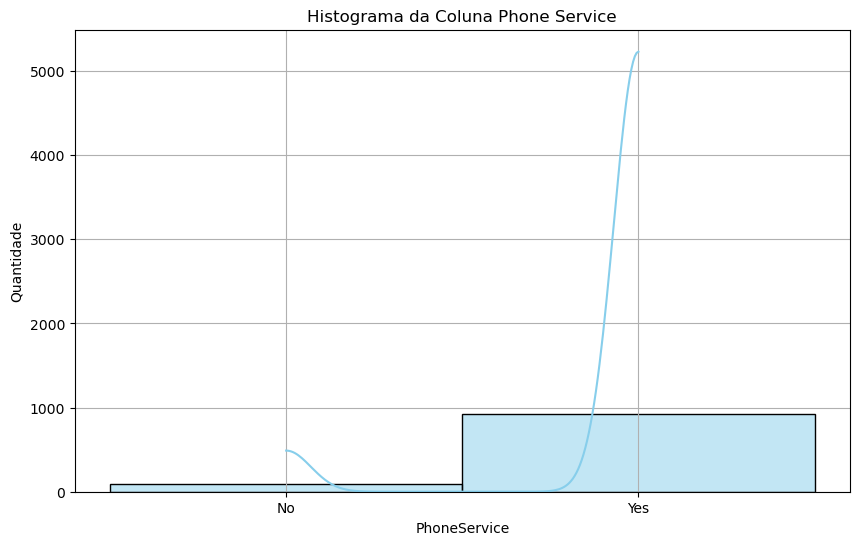

In [218]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.histplot(data=df, x='PhoneService', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna Phone Service')
plt.ylabel('Quantidade')
plt.show()

In [228]:
df['PhoneService'].fillna('Yes', inplace=True)

In [230]:
df.isnull().sum()/len(df)*100

customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
PhoneService           0.000000
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal      12.580386
Total_Pago             0.000000
Churn                  0.000000
dtype: float64

In [232]:
df['Pagamento_Mensal'].mean()

65.60756321839081

In [234]:
df['Pagamento_Mensal'].median()

71.45

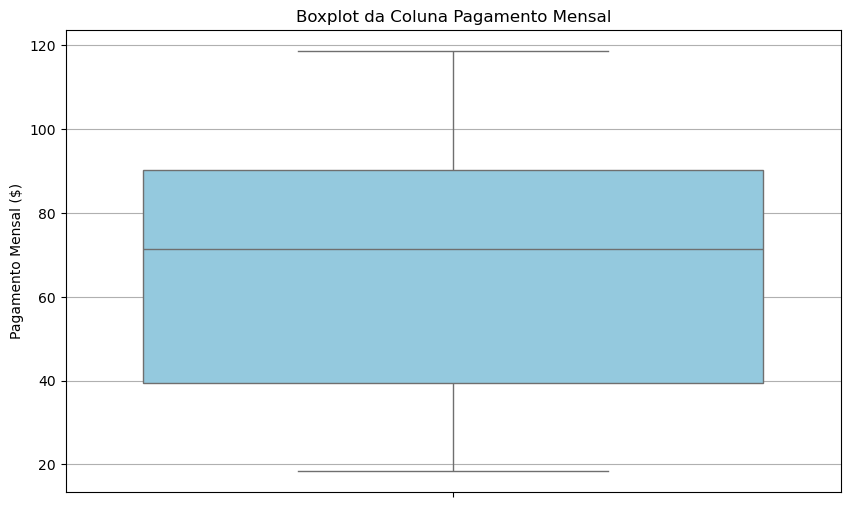

In [236]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da Coluna Pagamento Mensal')
plt.ylabel('Pagamento Mensal ($)')
plt.show()

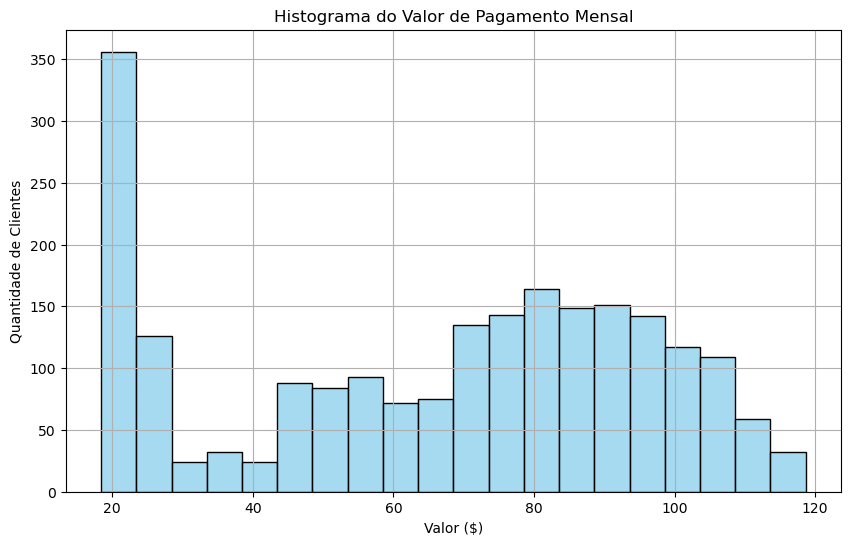

In [238]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.histplot(data=df, x='Pagamento_Mensal', bins=20, color='skyblue')
plt.xlabel('Valor ($)')
plt.title('Histograma do Valor de Pagamento Mensal')
plt.ylabel('Quantidade de Clientes')
plt.show()

In [242]:
Media_pg_Mensal = df['Pagamento_Mensal'].mean()

df['Pagamento_Mensal'].fillna(Media_pg_Mensal, inplace=True)

C:\Users\large\AppData\Local\Temp\ipykernel_9076\328878350.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pagamento_Mensal'].fillna(Media_pg_Mensal, inplace=True)


In [244]:
df.isnull().sum()/len(df)*100

customerID            0.0
Genero                0.0
Idoso                 0.0
Casado                0.0
Dependents            0.0
Tempo_como_Cliente    0.0
PhoneService          0.0
Servico_Internet      0.0
Servico_Seguranca     0.0
Suporte_Tecnico       0.0
StreamingTV           0.0
Tipo_Contrato         0.0
PaymentMethod         0.0
Pagamento_Mensal      0.0
Total_Pago            0.0
Churn                 0.0
dtype: float64

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma diferente e corrija.

In [246]:
df['Genero'].unique()
df['Servico_Internet'].unique()
df['Tipo_Contrato'].unique()
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [260]:
df['Genero']=df['Genero'].str.title()
df['Genero']=df['Genero'].replace({'f' : 'Female', 'F' : 'Female', 'M' :'Male'})

df['Servico_Internet']=df['Servico_Internet'].str.title()
df['Servico_Internet']=df['Servico_Internet'].replace({'dsl' : 'DSL'})

df['Tipo_Contrato']=df['Tipo_Contrato'].str.title()
df['Tipo_Contrato']=df['Tipo_Contrato'].replace({'Two Year' : 'Two Years'})

df['PaymentMethod']=df['PaymentMethod'].str.title()

In [264]:
df['Genero'].unique()
df['Servico_Internet'].unique()
df['Tipo_Contrato'].unique()
df['PaymentMethod'].unique()

array(['Electronic Check', 'Mailed Check', 'Bank Transfer (Automatic)',
       'Credit Card (Automatic)'], dtype=object)

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand

In [267]:
df.columns.tolist()

['customerID',
 'Genero',
 'Idoso',
 'Casado',
 'Dependents',
 'Tempo_como_Cliente',
 'PhoneService',
 'Servico_Internet',
 'Servico_Seguranca',
 'Suporte_Tecnico',
 'StreamingTV',
 'Tipo_Contrato',
 'PaymentMethod',
 'Pagamento_Mensal',
 'Total_Pago',
 'Churn']

In [269]:
df.rename(columns={'Dependents': 'Dependentes', 'PhoneService' : 'Serviço_Telefonico', 'PaymentMethod' : 'Forma_Pagamento'}, inplace=True)

In [271]:
df.columns.tolist()

['customerID',
 'Genero',
 'Idoso',
 'Casado',
 'Dependentes',
 'Tempo_como_Cliente',
 'Serviço_Telefonico',
 'Servico_Internet',
 'Servico_Seguranca',
 'Suporte_Tecnico',
 'StreamingTV',
 'Tipo_Contrato',
 'Forma_Pagamento',
 'Pagamento_Mensal',
 'Total_Pago',
 'Churn']